In [2]:
#from operator import le
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as pyplot
from csv import reader

In [3]:
def visualize_data(timestamps, x_arr, y_arr, z_arr):
    #plot untuk visualisasi data
    plt.figure(1)
    plt.plot(timestamps, x_arr, color = "blue", linewidth=1.0)
    plt.plot(timestamps, y_arr, color = "red", linewidth=1.0)
    plt.plot(timestamps, z_arr, color = "green", linewidth=1.0)
    plt.show()

Banyaknya data accelometer adalah 36622 data


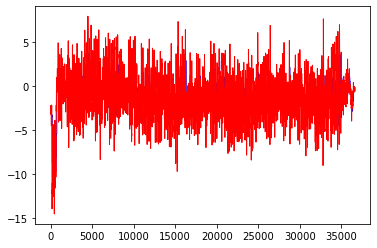

Banyaknya langkah pada dataset ini adalah sebanyak 390 langkah


In [4]:
#membaca data file
def read_data(filename):

    timestampArr = []
    xArr = []
    yArr = []
    zArr = []

    with open(filename, 'r') as accelRaws :
        accelReader = reader(accelRaws)

        for row in accelReader:
            timestampArr.append(row[0])
            xArr.append(row[1])
            yArr.append(row[2])
            zArr.append(row[3])
        
    return timestampArr, xArr, yArr, zArr

def lpf(xdata, ydata, zdata):
    x = []
    y = []
    z = []
    xk = float(xdata[0])
    yk = float(ydata[0])
    zk = float(zdata[0])

    delta_t = 0.01
    tou = 0.2
    alpha = delta_t / tou
    for i in range(len(xdata)):
        xk += alpha * (float(xdata[i])-xk)
        yk += alpha * (float(ydata[i])-yk)
        zk += alpha * (float(zdata[i])-zk)

        x.append(xk)
        y.append(yk)
        z.append(zk)
    return x,y,z

#fungsi menghitung langkah untuk mengembalikan sebuah array berisi timestamp dimana 1 langkah telah terjadi
def count_steps(timestamps, x_arr, y_arr, z_arr):
    rv = []

#variabel untuk menyimpan nilai max dan min threshold sebagai pembatas
    xMax = 0
    xMin = 0
    xTrshld = 0
#variabel untuk menyimpan array
    xTrs = []
    xCurrs = []
    mTrs = []

    xCurrent = 0
#sebagai pembatas untuk mengabaikan nilai yang terlalu jauh, drop yang jatuh dibawah treshold namun tidak melampaui margin, tidak
    decreaseMargin = 1

    declineCounter = 0
    inclined = True
    declined = False

    samplingPoints = []

    for itr in range(len(timestamps)):
        xCurrent = float(x_arr[itr])

        if(xMax == 0):
            xMax = xCurrent
            xMin = xCurrent

        if(xCurrent > xMax):
            xMax = xCurrent

        if(xCurrent < xMin):
            xMin = xCurrent

#jika treshold belum diset, maka program akan menunggu untuk digenerate, ketika acceleration drop dibawahnya, itu akan terhitung sebagai
#langkah selanjutnya hanya bisa terjadi ketika akselerasi melewati threshold dan turun lagi
        if(xTrshld != 0):
            if((xCurrent < (xTrshld - decreaseMargin)) and (declined == False) and (inclined == True)):
                declined = True
                inclined = False


            if((xCurrent > xTrshld) and (inclined != True) and (declined == False)):
                inclined = True

#Threshold diperbarui pada titik ini, setiap 50 data
        if(itr % 50 == 0):

            xTPrev = xTrshld
            xTrshld = (xMax + xMin) / 2

            xMax = 0
            xMin = 0

#Jika decline true maka dianggap sebagai 1 langkah
        if((declined == True)):
            declineCounter += 1
            rv.append(str(itr))
            declined = False 

#plot data dengan garis untuk menvisualisasikan data dengan tresholdnya
        samplingPoints.append(itr)
        xTrs.append(xTrshld)
        xCurrs.append(xCurrent)

        itr = itr + 1

    plt.figure(3)
    plt.plot(samplingPoints, xTrs, color = "blue", linewidth=1.0) 
    plt.plot(samplingPoints, xCurrs, color = "red", linewidth=1.0)        

    plt.show()

    return rv
#menghitung nilai magnitudo dari vektor yang ada
def magnitude(x,y,z):
    return np.linalg.norm((x,y,z))

#mengkonversi array timestamp kapan langkah terjadi menjadi sebuah array agar lebih mudah divisualisasikan
#setiap langkah yang terjadi akan terhitung sebagai nilai 5000 dan 0 jika tidak
def generate_step_array(timestamps, step_time):
    s_arr = []
    ctr = 0
    for i, time in enumerate(timestamps):
        if(ctr<len(step_time) and step_time[ctr]<=time):
            ctr += 1
            s_arr.append(5000)
        else:
            s_arr.append(0)
    while(len(s_arr)<len(timestamps)):
        s_arr.append(0)
    return s_arr

#cek kesamaan ukuran data
def check_data(t,x,y,z):
    if(len(t)!=len(x) or len(y)!=len(z) or len(x)!=len(y) ):
        print("Array of incorrect length")
        return False
    print("Banyaknya data accelometer adalah "+str(len(t))+" data")
    return True

def main():
    timestamps, x_array, y_array, z_array = read_data("accelometerr.csv")
    if(not check_data(timestamps, x_array, y_array, z_array)):
        return
    x,y,z = lpf(x_array,y_array,z_array)
    st = count_steps(timestamps, x, y, z)
    print("Banyaknya langkah pada dataset ini adalah sebanyak "+str(len(st))+" langkah")

main()

Banyaknya data accelometer adalah 3010 data


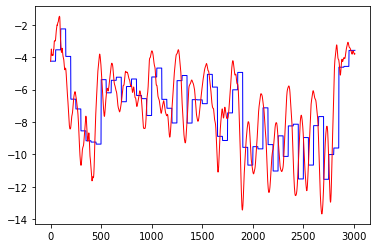

Banyaknya langkah pada dataset ini adalah sebanyak 19 langkah


In [6]:
def main():
    timestamps, x_array, y_array, z_array = read_data("accelometer.csv")
    if(not check_data(timestamps, x_array, y_array, z_array)):
        return
    x,y,z = lpf(x_array,y_array,z_array)
    st = count_steps(timestamps, x, y, z)
    print("Banyaknya langkah pada dataset ini adalah sebanyak "+str(len(st))+" langkah")

main()

def check_data(t,x,y,z):
    if(len(t)!=len(x) or len(y)!=len(z) or len(x)!=len(y) ):
        print("Array of incorrect length")
        return False
    print("Banyaknya data accelometer adalah "+str(len(t))+" data")
    return True


Banyaknya data accelometer adalah 36622 data


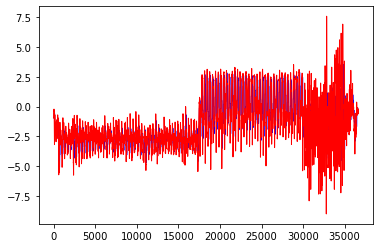

Banyaknya langkah pada dataset ini adalah sebanyak 193 langkah


In [7]:
def main():
    timestamps, x_array, y_array, z_array = read_data("accelometerrr.csv")
    if(not check_data(timestamps, x_array, y_array, z_array)):
        return
    x,y,z = lpf(x_array,y_array,z_array)
    st = count_steps(timestamps, x, y, z)
    print("Banyaknya langkah pada dataset ini adalah sebanyak "+str(len(st))+" langkah")

main()

def check_data(t,x,y,z):
    if(len(t)!=len(x) or len(y)!=len(z) or len(x)!=len(y) ):
        print("Array of incorrect length")
        return False
    print("Banyaknya data accelometer adalah "+str(len(t))+" data")
    return True
